# Data Collection and preprocessing 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
df=pd.read_csv('dataset.csv')
df

,p_id2,start_year,season_days_injured,total_days_injured,season_minutes_played,season_games_played,season_matches_in_squad,total_minutes_played,total_games_played,dob,...,cumulative_games_played,minutes_per_game_prev_seasons,avg_days_injured_prev_seasons,avg_games_per_season_prev_seasons,bmi,work_rate_numeric,position_numeric,significant_injury_prev_season,cumulative_days_injured,season_days_injured_prev_season
0,aaronconnolly,2019,13,161,1312.0,24,28,2148.0,41,2000-01-28,...,NaN,NaN,NaN,NaN,24.613627,2.5,2.0,NaN,NaN,NaN
1,aaronconnolly,2020,71,161,836.0,17,28,2148.0,41,2000-01-28,...,24.0,54.666667,13.0,24.0,24.613627,2.5,2.0,0.0,161.0,13.0
2,aaroncresswell,2016,95,226,2247.0,26,27,13368.0,149,1989-12-15,...,NaN,NaN,NaN,NaN,22.396079,3.5,1.0,NaN,NaN,NaN
3,aaroncresswell,2018,87,226,1680.0,20,27,13368.0,149,1989-12-15,...,26.0,86.423077,95.0,26.0,22.396079,3.5,1.0,0.0,226.0,95.0
4,aaroncresswell,2019,35,226,2870.0,31,31,13368.0,149,1989-12-15,...,46.0,85.369565,91.0,23.0,22.396079,3.5,1.0,0.0,452.0,87.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296,yoshinorimuto,2019,46,210,288.0,8,17,915.0,25,1992-07-15,...,17.0,36.882353,40.0,17.0,22.597274,4.0,2.0,0.0,210.0,40.0
1297,yvesbissouma,2018,124,124,1880.0,28,34,6477.0,86,1996-08-30,...,NaN,NaN,NaN,NaN,24.151673,3.5,3.0,NaN,NaN,NaN
1298,zacksteffen,2020,30,307,95.0,1,35,95.0,1,1995-04-02,...,NaN,NaN,NaN,NaN,23.244977,3.0,0.0,NaN,NaN,NaN
1299,zlatanibrahimovic,2016,210,579,2577.0,28,28,2699.0,33,1981-10-03,...,NaN,NaN,NaN,NaN,24.983563,2.5,2.0,NaN,NaN,NaN


In [3]:
df.columns

Index(['p_id2', 'start_year', 'season_days_injured', 'total_days_injured',
       'season_minutes_played', 'season_games_played',
       'season_matches_in_squad', 'total_minutes_played', 'total_games_played',
       'dob', 'height_cm', 'weight_kg', 'nationality', 'work_rate', 'pace',
       'physic', 'fifa_rating', 'position', 'age', 'cumulative_minutes_played',
       'cumulative_games_played', 'minutes_per_game_prev_seasons',
       'avg_days_injured_prev_seasons', 'avg_games_per_season_prev_seasons',
       'bmi', 'work_rate_numeric', 'position_numeric',
       'significant_injury_prev_season', 'cumulative_days_injured',
       'season_days_injured_prev_season'],
      dtype='object')

In [4]:
df.isnull().sum()

p_id2                                  0
start_year                             0
season_days_injured                    0
total_days_injured                     0
season_minutes_played                  0
season_games_played                    0
season_matches_in_squad                0
total_minutes_played                   0
total_games_played                     0
dob                                    0
height_cm                              0
weight_kg                              0
nationality                            0
work_rate                              0
pace                                  95
physic                                95
fifa_rating                            0
position                               2
age                                    0
cumulative_minutes_played            604
cumulative_games_played              604
minutes_per_game_prev_seasons        616
avg_days_injured_prev_seasons        604
avg_games_per_season_prev_seasons    604
bmi             

In [5]:
df.isnull().any()

p_id2                                False
start_year                           False
season_days_injured                  False
total_days_injured                   False
season_minutes_played                False
season_games_played                  False
season_matches_in_squad              False
total_minutes_played                 False
total_games_played                   False
dob                                  False
height_cm                            False
weight_kg                            False
nationality                          False
work_rate                            False
pace                                  True
physic                                True
fifa_rating                          False
position                              True
age                                  False
cumulative_minutes_played             True
cumulative_games_played               True
minutes_per_game_prev_seasons         True
avg_days_injured_prev_seasons         True
avg_games_p

In [6]:
df['pace'].fillna(df['pace'].median(), inplace=True)
df['physic'].fillna(df['physic'].median(), inplace=True)
df['position'].fillna(df['position'].mode()[0], inplace=True)
df['cumulative_minutes_played'].fillna(0, inplace=True)
df['cumulative_games_played'].fillna(0, inplace=True)
df['minutes_per_game_prev_seasons'].fillna(0, inplace=True)
df['avg_days_injured_prev_seasons'].fillna(0, inplace=True)
df['avg_games_per_season_prev_seasons'].fillna(0, inplace=True)
df['position_numeric'].fillna(df['position_numeric'].mode()[0], inplace=True)
df['significant_injury_prev_season'].fillna(0, inplace=True)
df['cumulative_days_injured'].fillna(0, inplace=True)
df['season_days_injured_prev_season'].fillna(0, inplace=True)

In [7]:
df.isnull().any()

p_id2                                False
start_year                           False
season_days_injured                  False
total_days_injured                   False
season_minutes_played                False
season_games_played                  False
season_matches_in_squad              False
total_minutes_played                 False
total_games_played                   False
dob                                  False
height_cm                            False
weight_kg                            False
nationality                          False
work_rate                            False
pace                                 False
physic                               False
fifa_rating                          False
position                             False
age                                  False
cumulative_minutes_played            False
cumulative_games_played              False
minutes_per_game_prev_seasons        False
avg_days_injured_prev_seasons        False
avg_games_p

# Feature Engineering

In [8]:
# Create target column: High Risk (1) if season_days_injured > 14, else Low Risk (0)
df['injury_risk'] = df['season_days_injured'].apply(lambda x: 1 if x > 14 else 0)


# Exploratory Data Analysis (EDA)

In [9]:
df.columns 

Index(['p_id2', 'start_year', 'season_days_injured', 'total_days_injured',
       'season_minutes_played', 'season_games_played',
       'season_matches_in_squad', 'total_minutes_played', 'total_games_played',
       'dob', 'height_cm', 'weight_kg', 'nationality', 'work_rate', 'pace',
       'physic', 'fifa_rating', 'position', 'age', 'cumulative_minutes_played',
       'cumulative_games_played', 'minutes_per_game_prev_seasons',
       'avg_days_injured_prev_seasons', 'avg_games_per_season_prev_seasons',
       'bmi', 'work_rate_numeric', 'position_numeric',
       'significant_injury_prev_season', 'cumulative_days_injured',
       'season_days_injured_prev_season', 'injury_risk'],
      dtype='object')

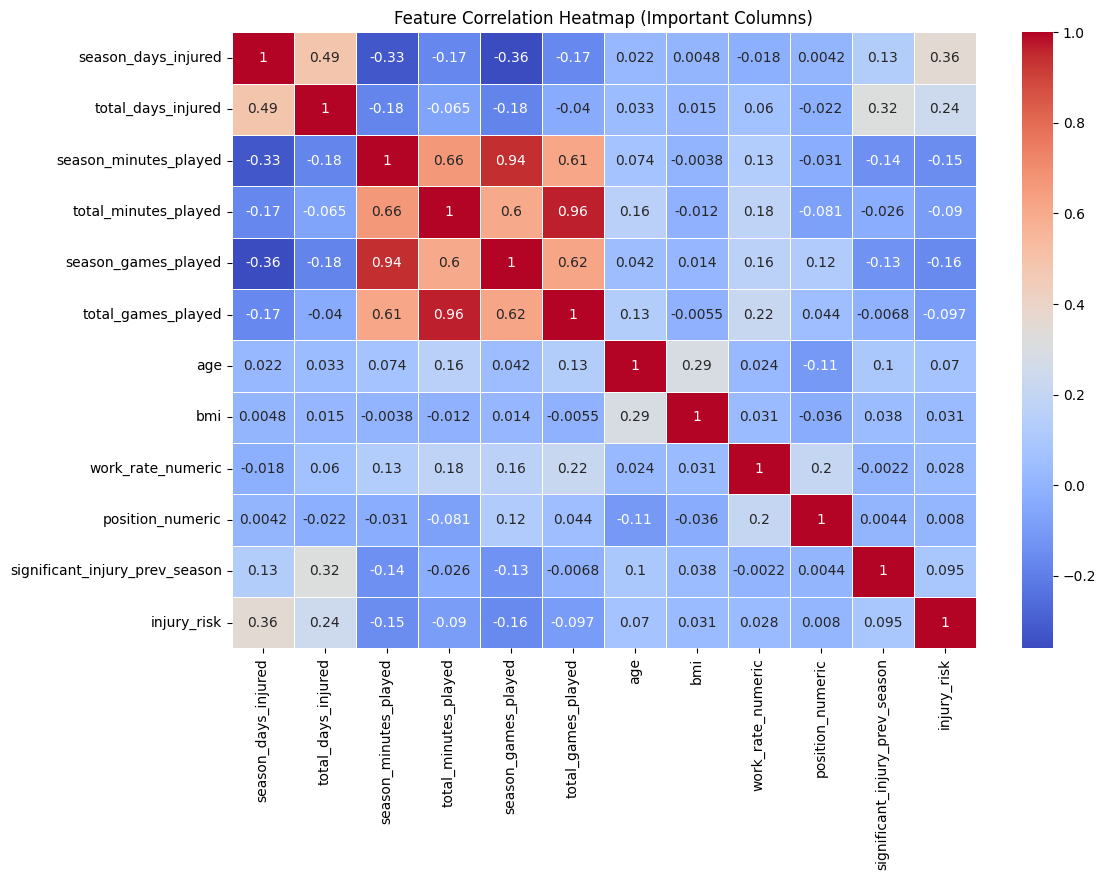

In [10]:
# Select important columns for correlation
important_cols = [
    'season_days_injured', 'total_days_injured', 'season_minutes_played',
    'total_minutes_played', 'season_games_played', 'total_games_played',
    'age', 'bmi', 'work_rate_numeric', 'position_numeric',
    'significant_injury_prev_season', 'injury_risk'
]

# Filter dataframe with important columns
df_corr = df[important_cols]

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap (Important Columns)")
plt.show()



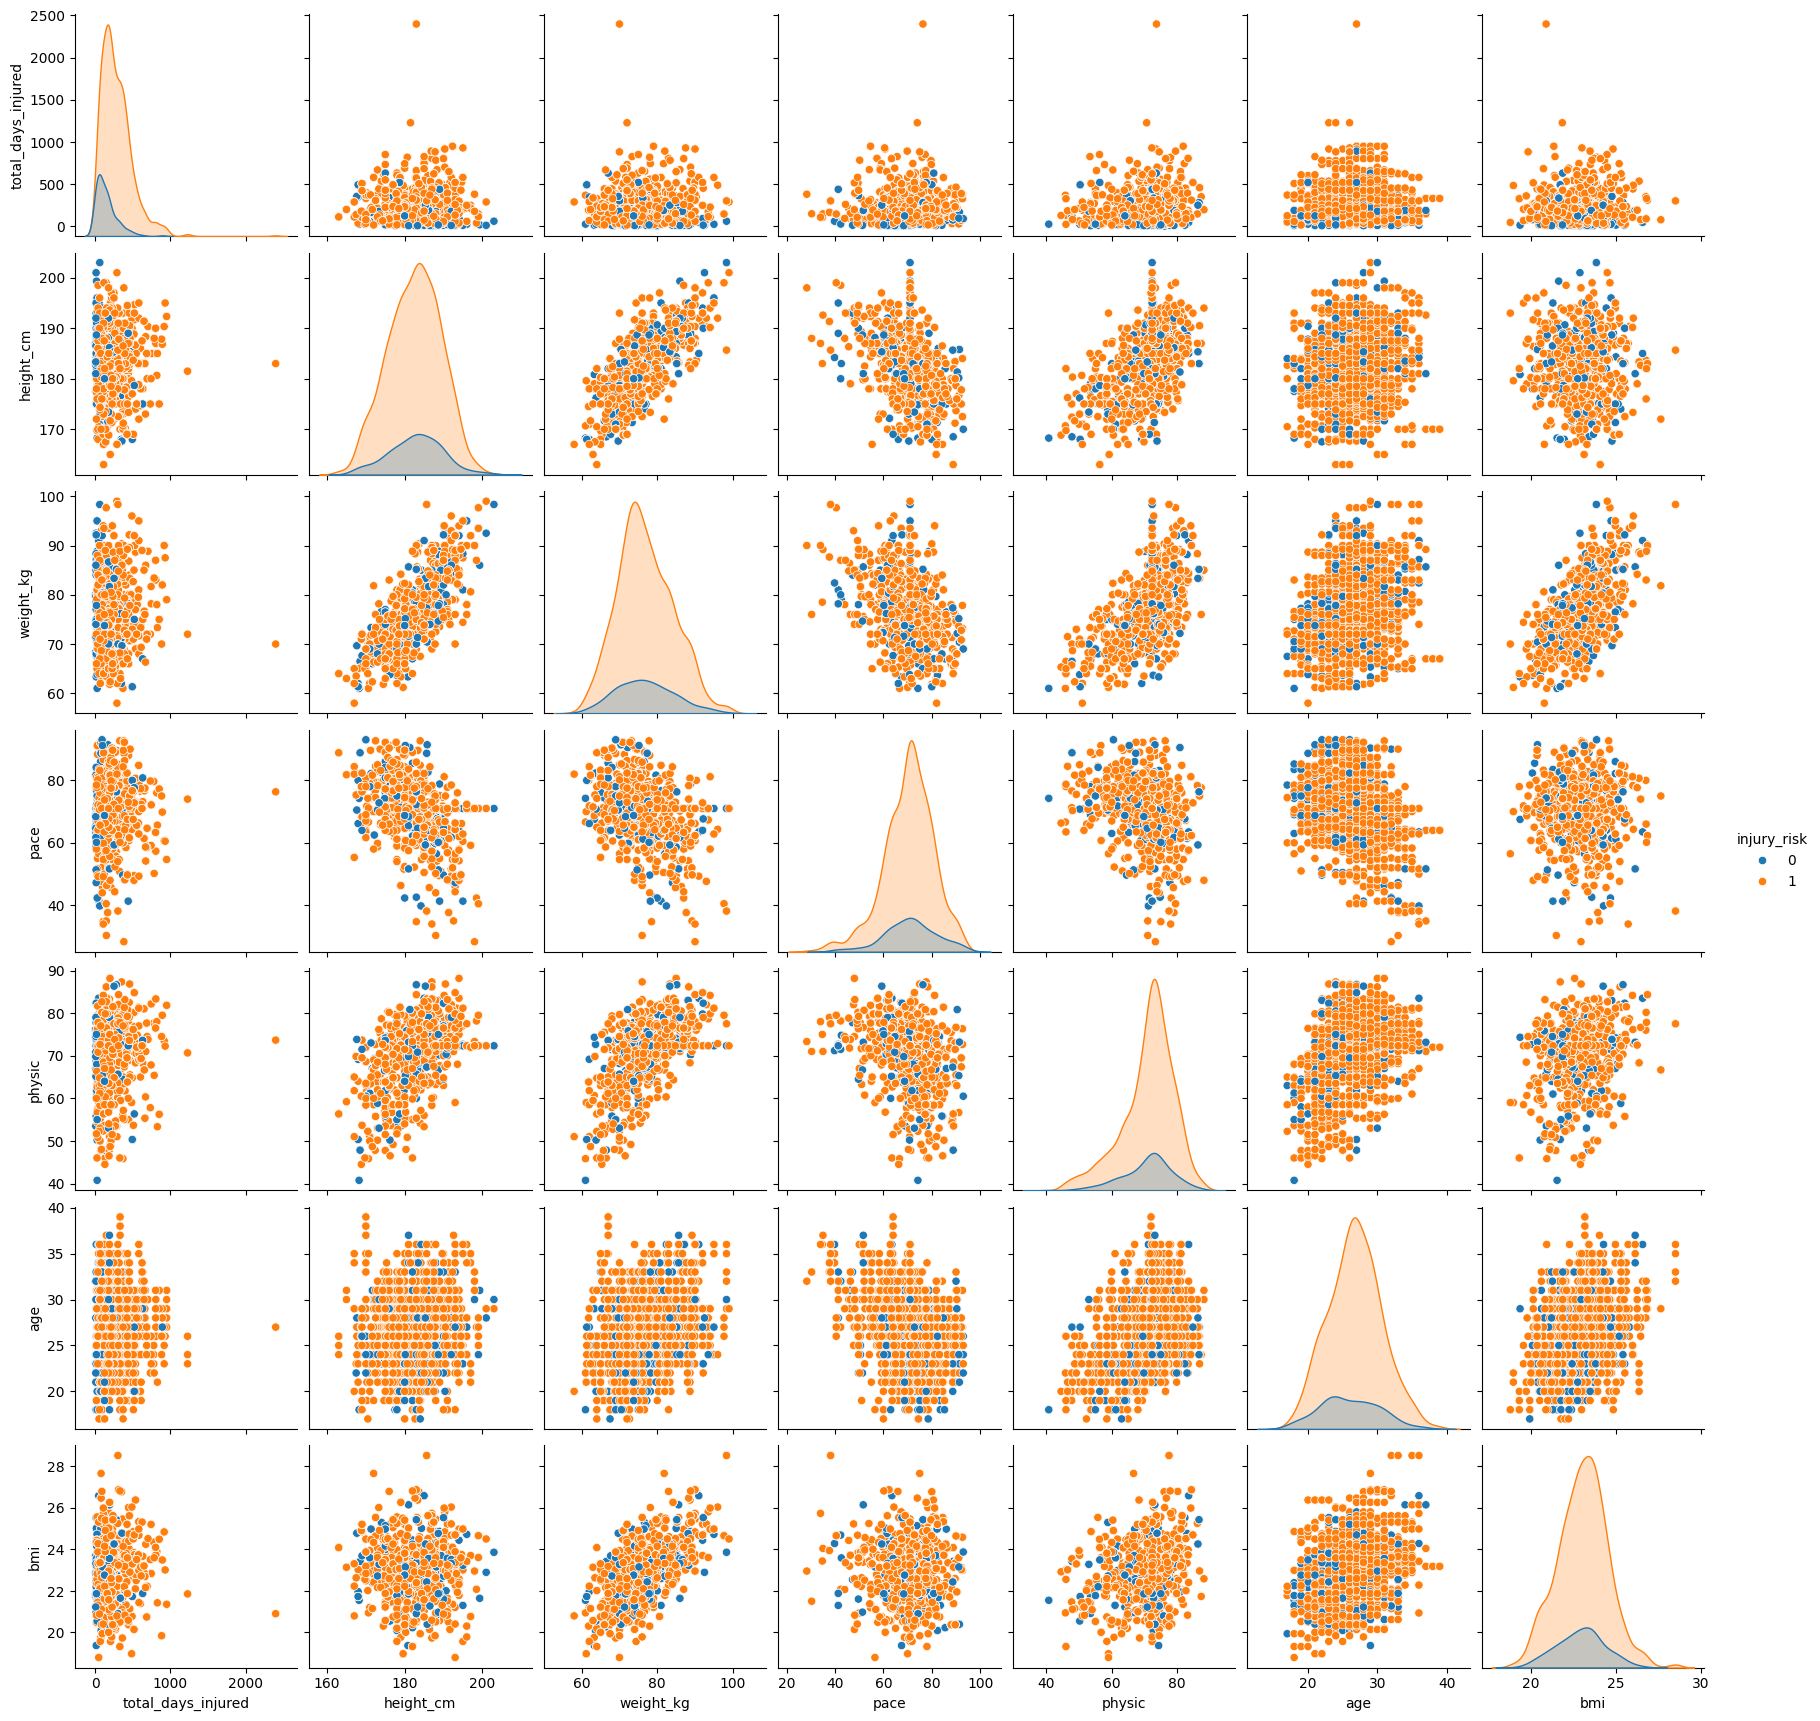

In [11]:
sns.pairplot(df[[  'total_days_injured',
        'height_cm', 'weight_kg',  'work_rate', 'pace',
       'physic',  'position', 'age', 
       
       'bmi', 'injury_risk'
       ]],hue='injury_risk')
plt.show()


/tmp/ipykernel_27600/3161768224.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=position_injury.index, y=position_injury.values, palette='viridis')


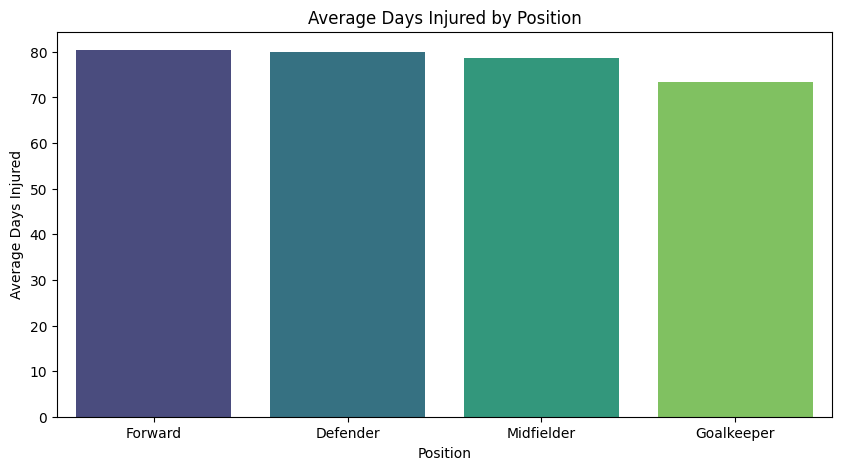

In [12]:
# Position-wise injury analysis
position_injury = df.groupby('position')['season_days_injured'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=position_injury.index, y=position_injury.values, palette='viridis')
plt.title('Average Days Injured by Position')
plt.ylabel('Average Days Injured')
plt.xlabel('Position')
plt.show()


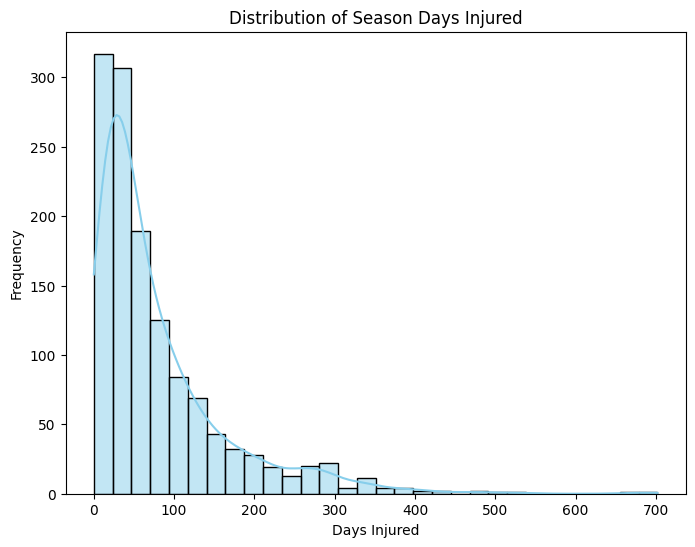

In [13]:
#Distribution of Injury Days
plt.figure(figsize=(8, 6))
sns.histplot(df['season_days_injured'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Season Days Injured')
plt.xlabel('Days Injured')
plt.ylabel('Frequency')
plt.show()


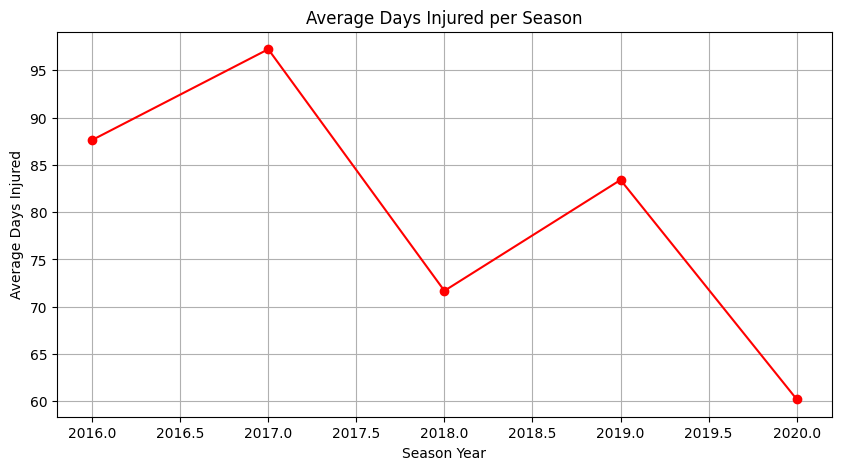

In [14]:
#Injury Trends Over Time
season_trend = df.groupby('start_year')['season_days_injured'].mean()

plt.figure(figsize=(10, 5))
season_trend.plot(marker='o', color='red')
plt.title('Average Days Injured per Season')
plt.xlabel('Season Year')
plt.ylabel('Average Days Injured')
plt.grid(True)
plt.show()


In [15]:
df.to_csv('cleaned_players_dataset.csv')

# Model building

In [16]:
# Select features and target
features = ['age', 'season_minutes_played', 'season_games_played', 'pace', 'physic',
            'bmi', 'minutes_per_game_prev_seasons', 'avg_days_injured_prev_seasons',
            'cumulative_minutes_played', 'cumulative_games_played']

target = df['injury_risk']



In [17]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], target, test_size=0.2, random_state=42)


In [18]:
# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Accuracy: 0.89272030651341


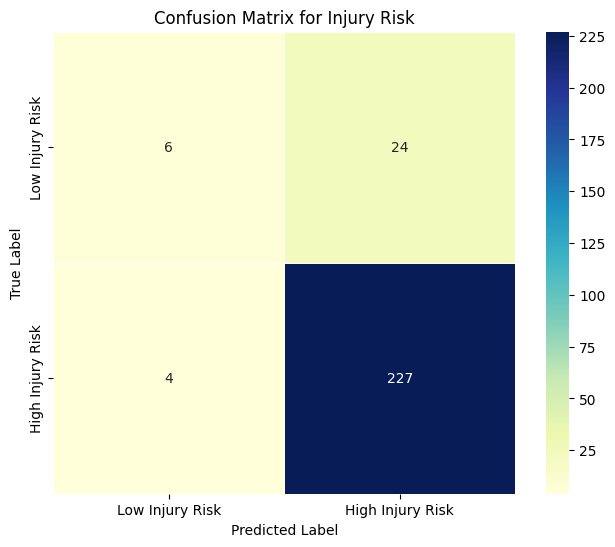

In [19]:
# Evaluate model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5, square=True,
            xticklabels=['Low Injury Risk', 'High Injury Risk'], 
            yticklabels=['Low Injury Risk', 'High Injury Risk'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Injury Risk')
plt.show()

In [20]:
# Saving  model
import pickle
pickle.dump(model, open("injury_model.pkl", "wb"))